In [1]:
import numpy as np
import pandas as pd


In [2]:
defaulter = pd.read_csv("defaulter.csv")

In [3]:
defaulter

,defaulter,student,balance,income
0,No,Yes,817.1804,12106.14
1,Yes,Yes,1486.9980,17854.40
2,Yes,Yes,1102.4350,17391.78
3,Yes,Yes,1233.4460,12586.48
4,Yes,Yes,1276.6850,19282.44
5,Yes,Yes,1289.2460,13624.55
6,No,Yes,673.8124,17672.29
7,No,No,870.4124,17685.45
8,No,Yes,903.1768,15810.57
9,No,Yes,879.6270,14898.31


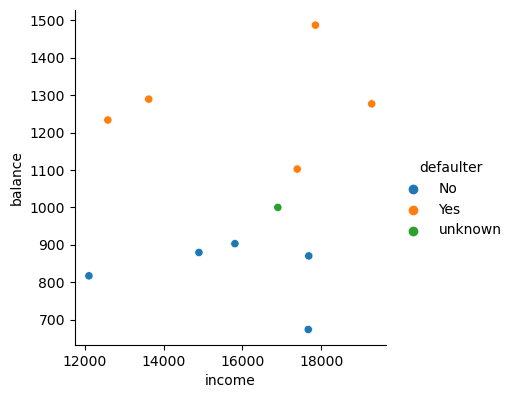

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(defaulter  ,hue="defaulter" , x_vars ="income" , y_vars = "balance" , height=4)

In [5]:
x1 = defaulter.loc[0,["balance" , "income"]]
x2 = defaulter.loc[1,["balance","income"]]
np.linalg.norm(x1-x2)


5787.1537602581275

In [6]:
t1 = np.array([26,1000])
t2 = np.array([66,1000])
t3 = np.array([36,10000])

dist_t3_t1 = np.linalg.norm(t3-t1)

dist_t2_t3 = np.linalg.norm(t2-t3)
print("distance between t2 and t3 " , dist_t2_t3)
print("distance between t1 and t3" , dist_t3_t1)


distance between t2 and t3  9000.049999861112
distance between t1 and t3 9000.00555555384


In [7]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaled_values = scaler.fit_transform(defaulter[["balance" , "income"]])
defaulter["norm_balance"] = scaled_values[:,0]
defaulter["norm_income"] = scaled_values[:,1]
defaulter

,defaulter,student,balance,income,norm_balance,norm_income
0,No,Yes,817.1804,12106.14,0.176304,0.000000
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587
6,No,Yes,673.8124,17672.29,0.000000,0.775630
7,No,No,870.4124,17685.45,0.241765,0.777463
8,No,Yes,903.1768,15810.57,0.282057,0.516203
9,No,Yes,879.6270,14898.31,0.253097,0.389082


In [8]:
x1_n = defaulter.loc[0,["norm_balance" , "norm_income"]]
x2_n = defaulter.loc[1,["norm_balance","norm_income"] ]
np.linalg.norm(x1_n - x2_n)

1.1489497815843788

In [9]:
x11 = defaulter.loc[10,["norm_balance" , "norm_income"]]
dist_to_x11 = lambda x: np.linalg.norm(x-x11)

defaulter["dist_tox11"] = defaulter[["norm_balance" ,"norm_income"]].apply(dist_to_x11,axis=1)
defaulter.sort_values("dist_tox11")

,defaulter,student,balance,income,norm_balance,norm_income,dist_tox11
10,unknown,Yes,1000.0000,16900.00,0.401123,0.668013,0.000000
2,Yes,Yes,1102.4350,17391.78,0.527091,0.736541,0.143401
8,No,Yes,903.1768,15810.57,0.282057,0.516203,0.192932
7,No,No,870.4124,17685.45,0.241765,0.777463,0.193325
9,No,Yes,879.6270,14898.31,0.253097,0.389082,0.315775
6,No,Yes,673.8124,17672.29,0.000000,0.775630,0.415309
4,Yes,Yes,1276.6850,19282.44,0.741371,1.000000,0.475378
5,Yes,Yes,1289.2460,13624.55,0.756818,0.211587,0.578657
1,Yes,Yes,1486.9980,17854.40,1.000000,0.801006,0.613466
3,Yes,Yes,1233.4460,12586.48,0.688199,0.066934,0.666114


In [10]:
from sklearn.model_selection import train_test_split
X = defaulter[["norm_balance" , "norm_income"]]
Y = defaulter["defaulter"]

X_train ,X_test , Y_train , Y_test = train_test_split(X,Y,test_size=0.2 , random_state=100)


In [11]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3,metric="euclidean")
model.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [12]:
train_accuracy = model.score(X_train , Y_train)
test_accuracy = model.score(X_test,Y_test)
print(train_accuracy , test_accuracy)

0.75 1.0


In [13]:
train_accuracies = []
test_accuracies = []
# building KNN model for values of k from 1 to 100
k_vals = [i for i in range(1,100)]
features = ["norm_balance","norm_income"]
target = "defaulter"
for k in k_vals:
    model = KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    model.fit(X_train,Y_train)
    train_accuracy_k = model.score(X_train,Y_train)
    test_accuracy_k = model.score(X_test,Y_test)
    train_accuracies.append(train_accuracy_k)
    test_accuracies.append(test_accuracy_k)
plt.plot(k_vals,train_accuracies)
plt.plot(k_vals,test_accuracies)


ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 9, n_samples_fit = 8, n_samples = 8